In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv('/Users/Yasin/Desktop/Data Science Track/Capstone2-ieee-fraud-detection/train_merged.csv')
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,0.0,150.0,discover,142.0,...,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 63.0,26.508597,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.000000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
print('  {:.4f}% of Transactions that are fraud in train '.format(train['isFraud'].mean() * 100))

  3.4990% of Transactions that are fraud in train 


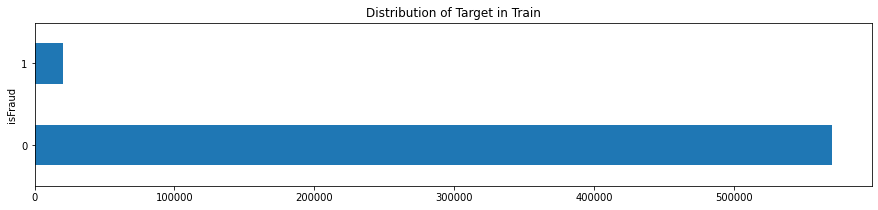

In [4]:
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

train.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribution of Target in Train',
          figsize=(15, 3))
plt.show()

## TransactionAmt

The amount of transaction. I've taken a log transform in some of these plots to better show the distribution- otherwise the few, very large transactions skew the distribution. Because of the log transfrom, any values between 0 and 1 will appear to be negative.

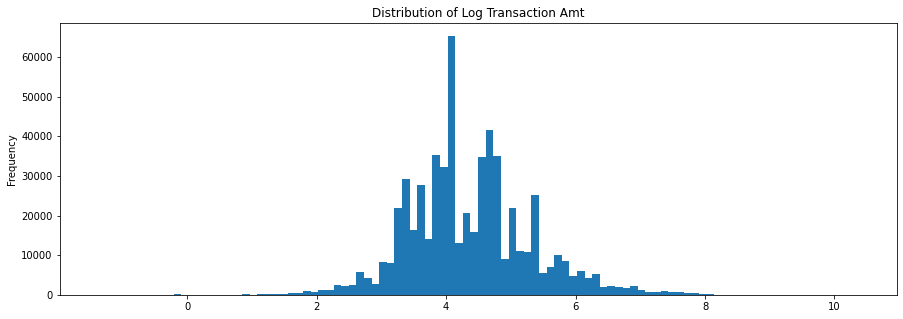

In [5]:
train['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribution of Log Transaction Amt')
plt.show()

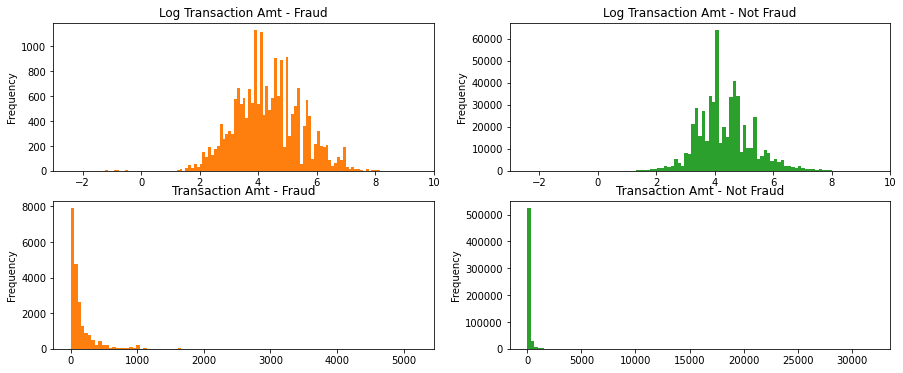

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()

Fraudulent charges appear to have a higher average transaction ammount

In [7]:
print('Mean transaction amt for fraud is {:.4f}'.format(train.loc[train['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train.loc[train['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


## Categorical Features

We are told in the data description that the following transaction columns are categorical:

ProductCD

emaildomain

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

DeviceType

DeviceInfo

id_12 - id_38

## ProductCD

For now we don't know exactly what these values represent.

W has the most number of observations, C the least.

ProductCD C has the most fraud with >11%

ProductCD W has the least with ~2%

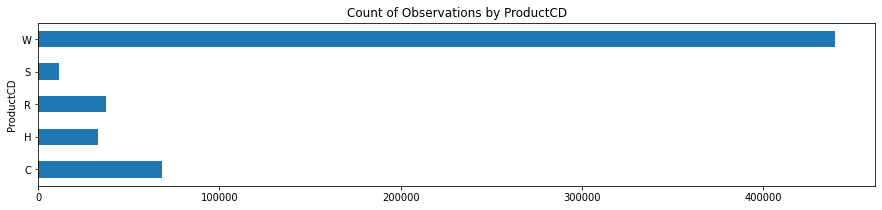

In [8]:
train.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

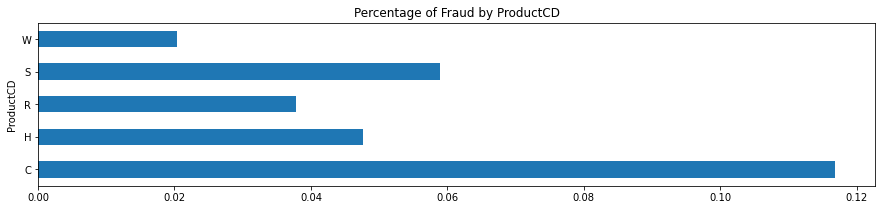

In [9]:
train.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

## Device Type & Device Info

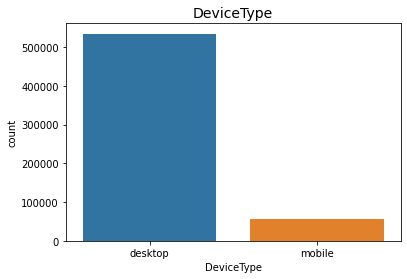

In [11]:
ax = sns.countplot(x="DeviceType", data=train)
ax.set_title('DeviceType', fontsize=14)
plt.show()

## card1 - card6

We are told these are all categorical, even though some appear numeric.

In [12]:
card_cols = [c for c in train.columns if 'card' in c]
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,0.0,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


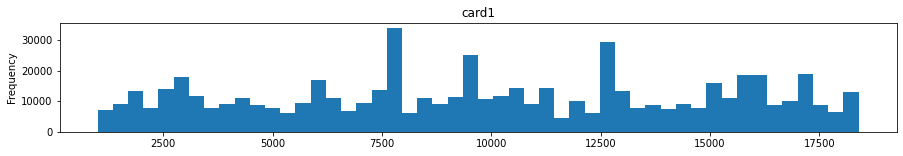

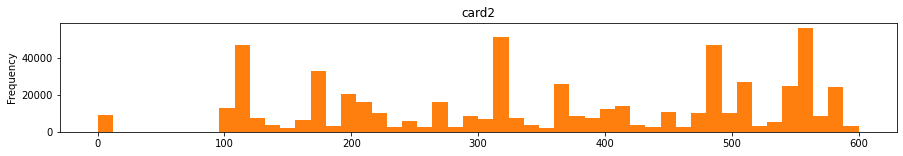

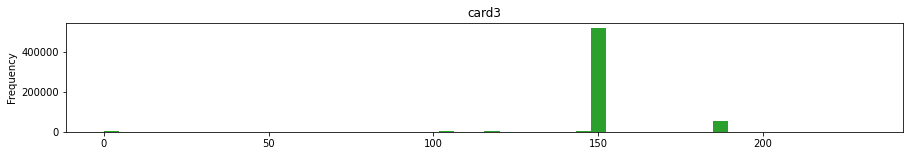

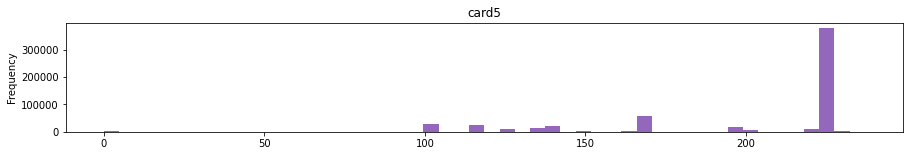

In [13]:
color_idx = 0
for c in card_cols:
    if train[c].dtype in ['float64','int64']:
        train[c].plot(kind='hist',
                                      title=c,
                                      bins=50,
                                      figsize=(15, 2),
                                      color=color_pal[color_idx])
    color_idx += 1
    plt.show()

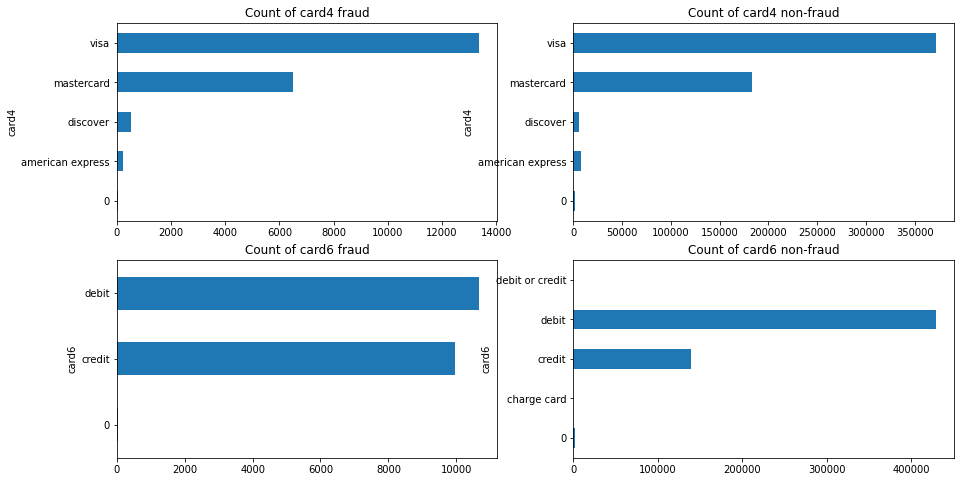

In [14]:
train_fr = train.loc[train['isFraud'] == 1]
train_nofr = train.loc[train['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
train_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
train_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()

## addr1 & addr2

The data description states that these are categorical even though they look numeric. Could they be the address value?

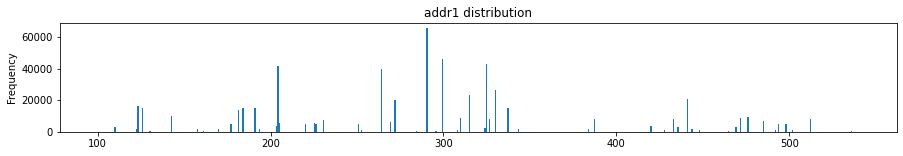

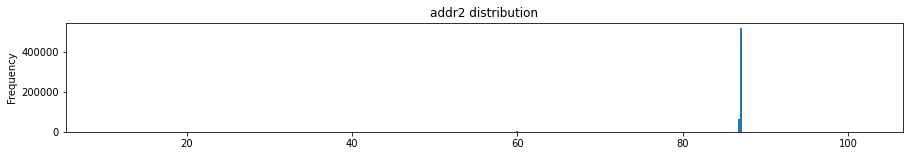

In [15]:
train['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution')
plt.show()
train['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution')
plt.show()

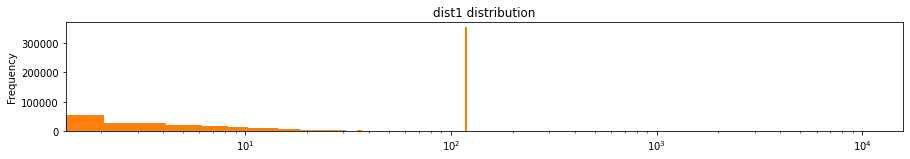

In [16]:
train['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist1 distribution',
                                color=color_pal[1],
                                logx=True)
plt.show()

## Device Type

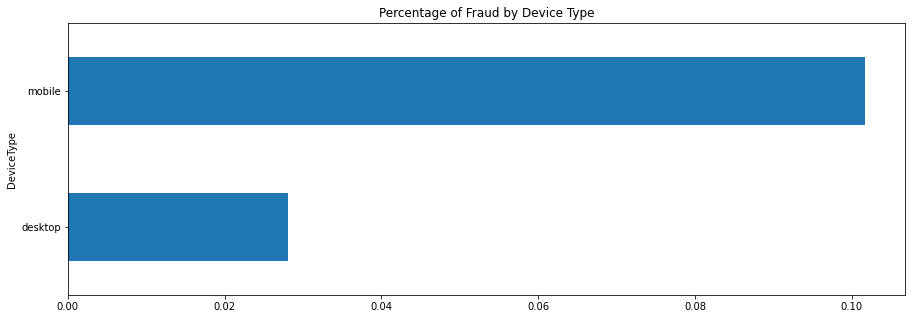

In [17]:
train.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

## Device Info

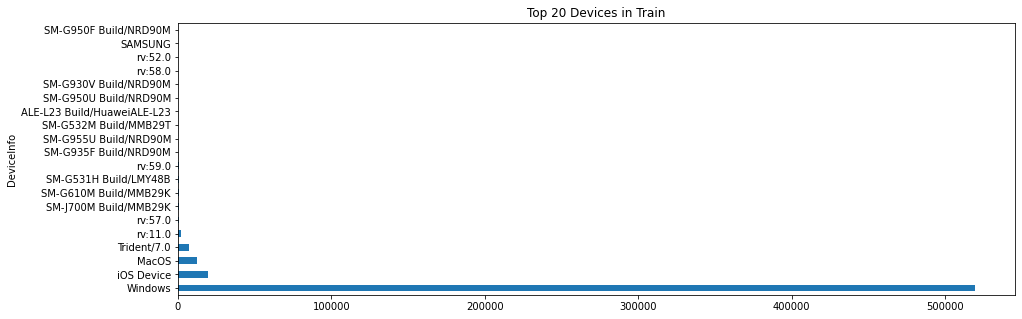

In [18]:
train.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

## P_emaildomain

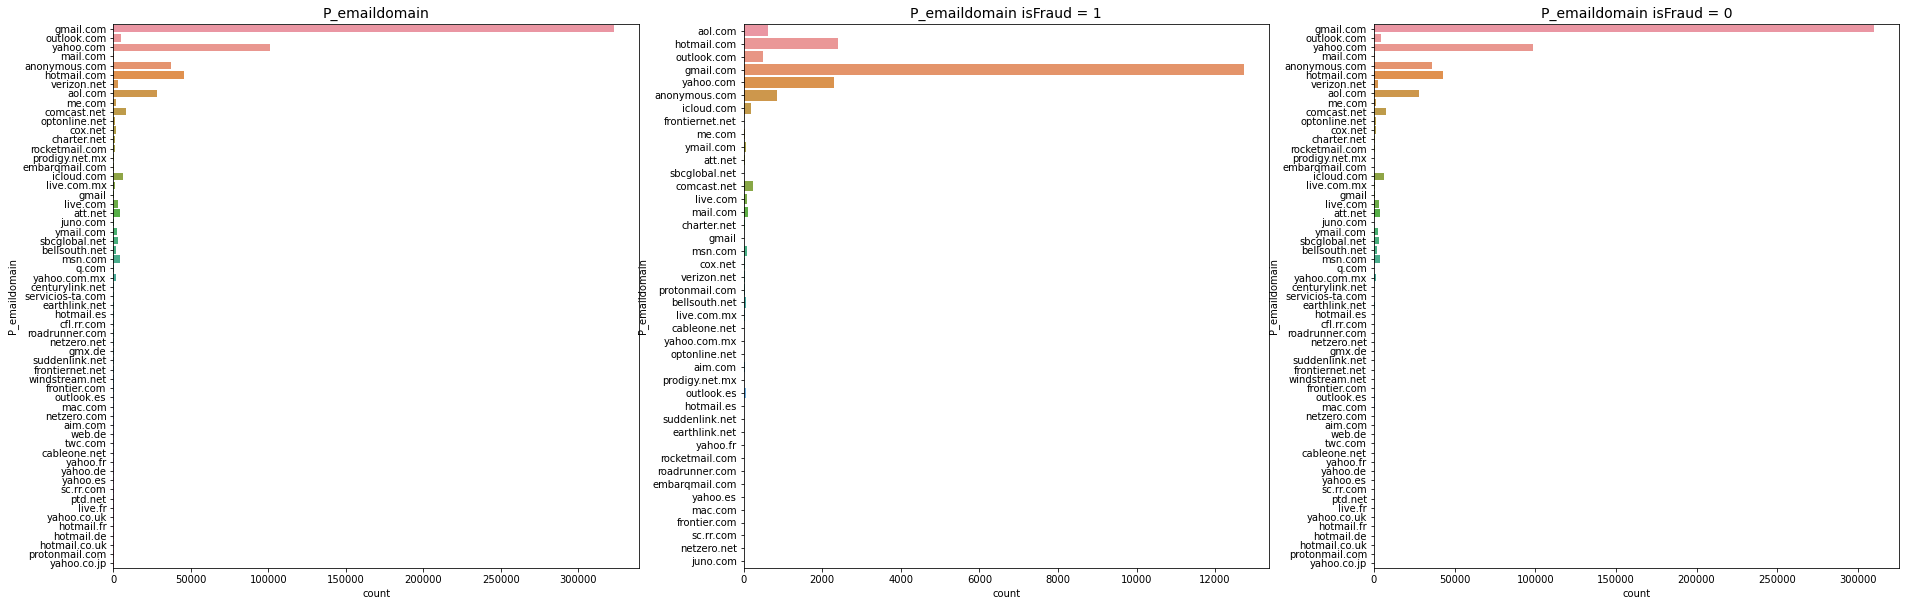

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(32,10))

sns.countplot(y="P_emaildomain", ax=ax[0], data=train)
ax[0].set_title('P_emaildomain', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[1], data=train.loc[train['isFraud'] == 1])
ax[1].set_title('P_emaildomain isFraud = 1', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[2], data=train.loc[train['isFraud'] == 0])
ax[2].set_title('P_emaildomain isFraud = 0', fontsize=14)
plt.show()

## R_emaildomain

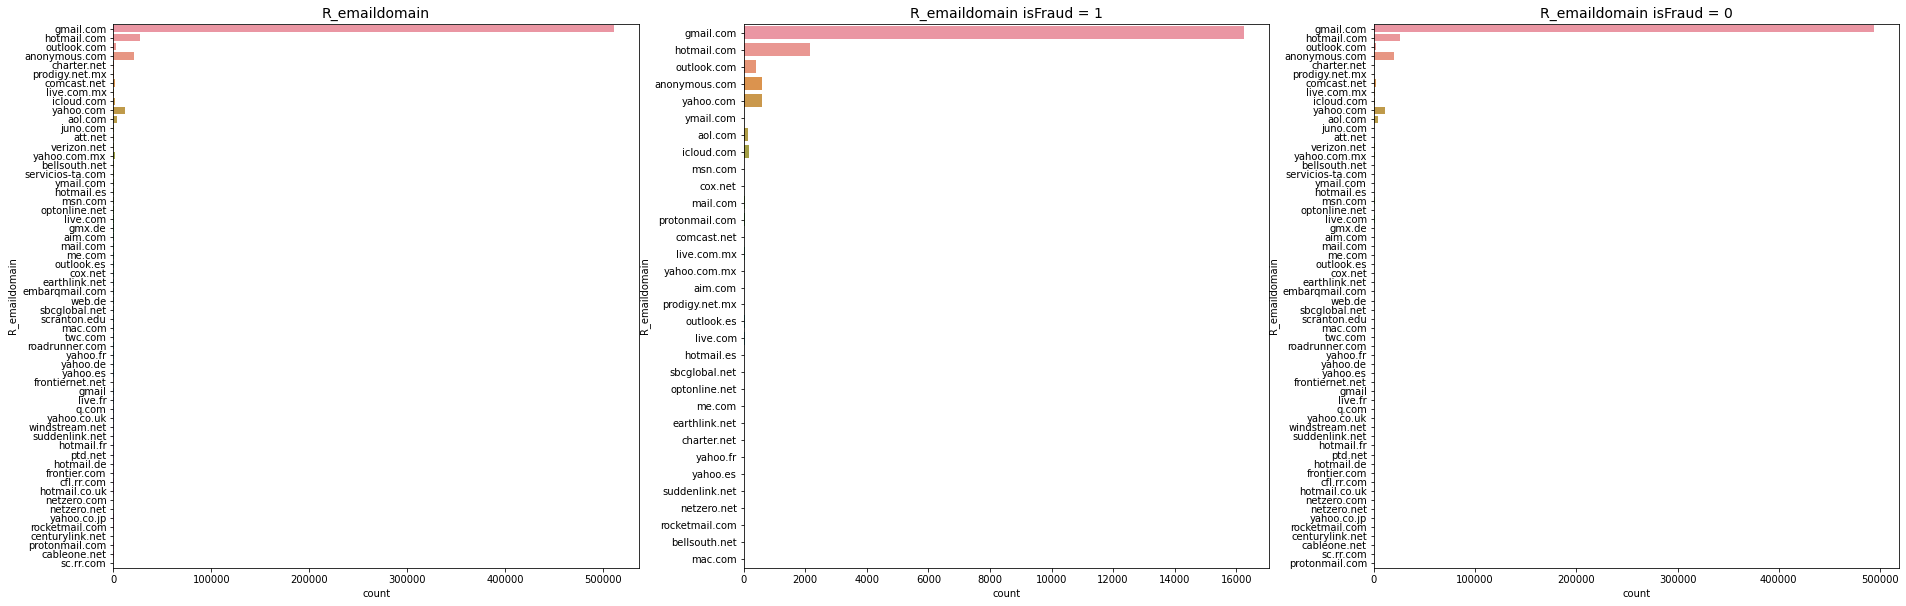

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(32,10))

sns.countplot(y="R_emaildomain", ax=ax[0], data=train)
ax[0].set_title('R_emaildomain', fontsize=14)
sns.countplot(y="R_emaildomain", ax=ax[1], data=train.loc[train['isFraud'] == 1])
ax[1].set_title('R_emaildomain isFraud = 1', fontsize=14)
sns.countplot(y="R_emaildomain", ax=ax[2], data=train.loc[train['isFraud'] == 0])
ax[2].set_title('R_emaildomain isFraud = 0', fontsize=14)
plt.show()

It seems that criminals prefer gmail

## id_code

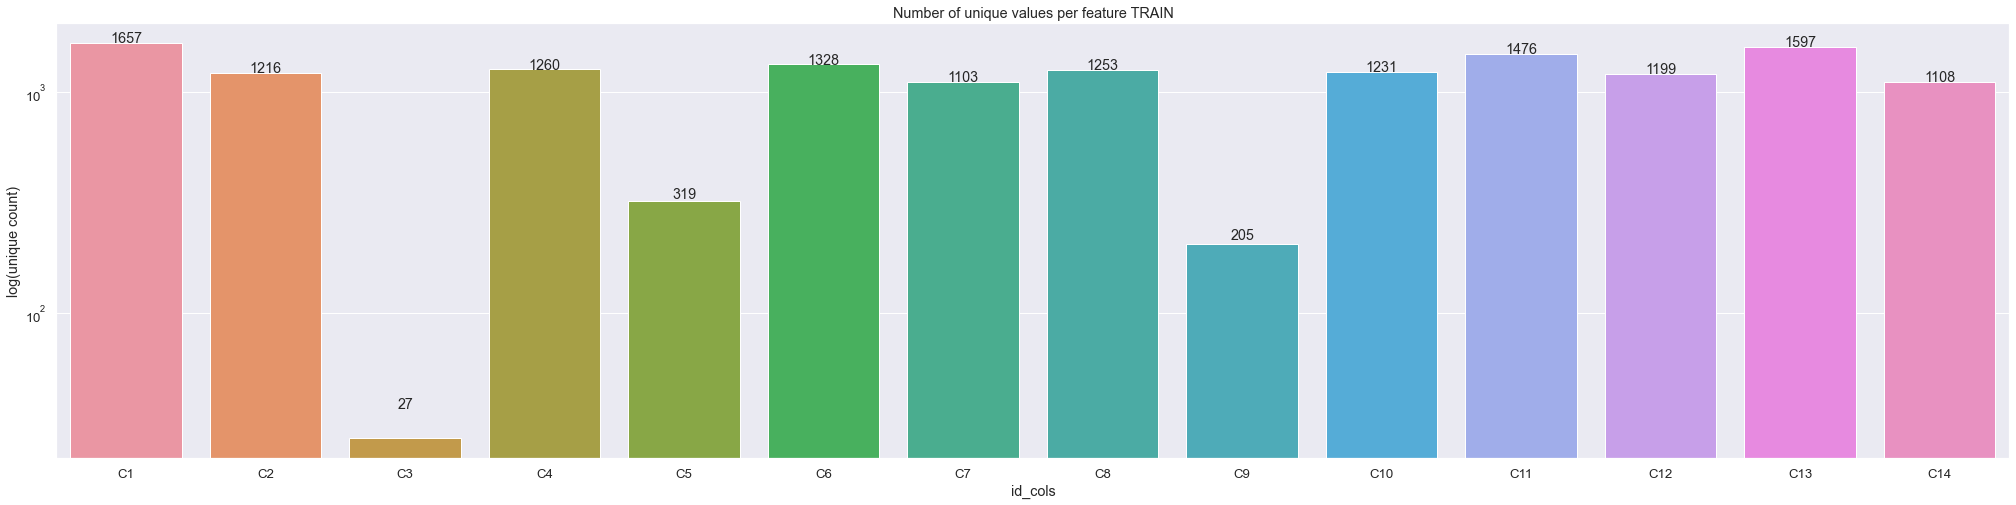

In [22]:
plt.figure(figsize=(35, 8))
id_cols = [c for c in train if c[0] == 'C']
uniques = [len(train[col].unique()) for col in id_cols]
sns.set(font_scale=1.2)
ax = sns.barplot(id_cols, uniques, log=True)
ax.set(xlabel='id_cols', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center")

## Non-Categorical Data

## dist1 & dist2

"\nplt.show()\ntrain['dist2'].plot(kind='hist',\n                                bins=5000,\n                                figsize=(15, 2),\n                                title='dist2 distribution',\n                                color=color_pal[1],\n                                logx=True)\nplt.show()\n"

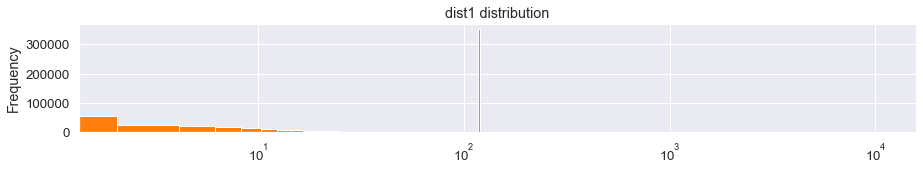

In [24]:
train['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist1 distribution',
                                color=color_pal[1],
                                logx=True)
'''
plt.show()
train['dist2'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist2 distribution',
                                color=color_pal[1],
                                logx=True)
plt.show()
'''
# dist2 was dropped because of so many missing values.

## C1 - C14

Because we are provided many numerical columns, we can create a pairplot to plot feature interactions. I know these plots can be hard to read, but it is helpful for gaining intution about potential feature interactions and if certain features have more variance than others.

In [25]:
c_cols = [c for c in train if c[0] == 'C']
train[c_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


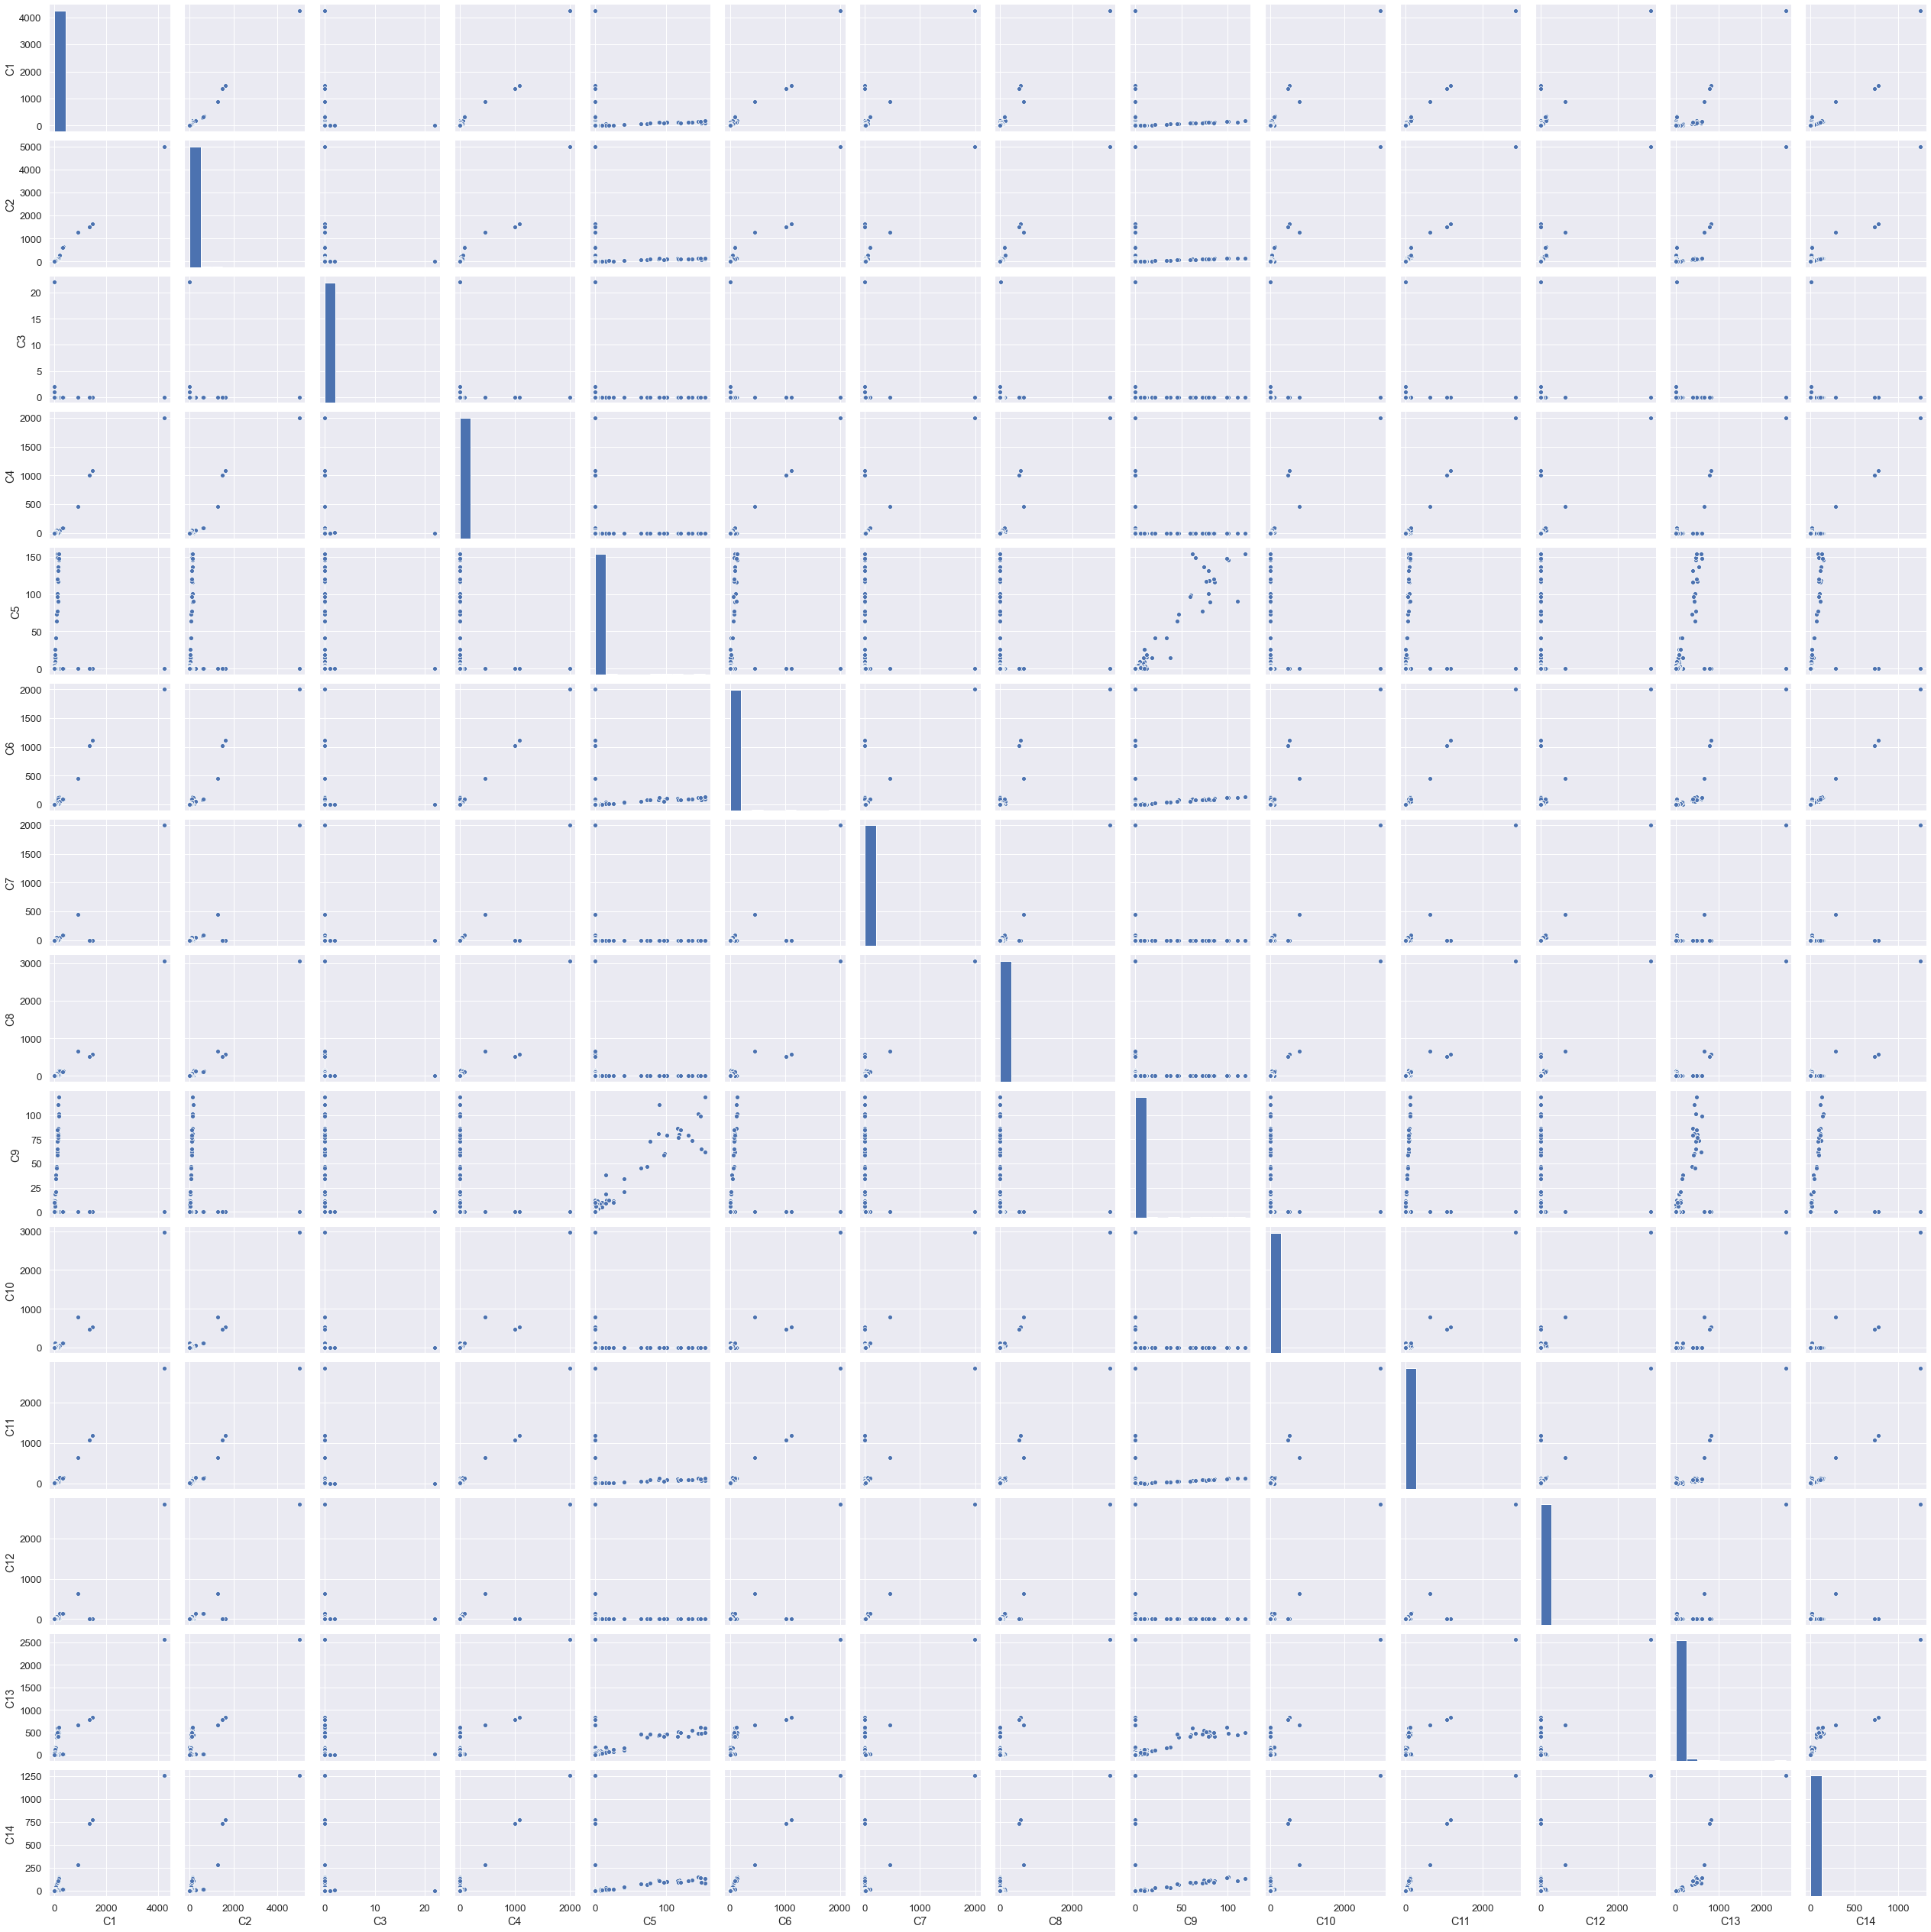

In [32]:
# Sample 500 fraud and 500 non-fraud examples to plot
sampled_train = pd.concat([train.loc[train['isFraud'] == 0].sample(500),
          train.loc[train['isFraud'] == 1].sample(500)])

sns.pairplot(sampled_train, 
            vars=c_cols)
plt.show()

## D1-D9

Similarly for features D1-D9. In these plots we can see some linear and non-linear interactions between features. We may want to create additional features using these interactions if we think it would help our model better find relationship between fraud and non-fraud observations.

In [33]:
d_cols = [c for c in train if c[0] == 'D']
train[d_cols].head()

,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,DeviceType,DeviceInfo
0,14.0,169.563231,13.000000,140.002441,42.335965,69.805717,146.058108,0.561057,13.000000,13.000000,54.037533,17.901295,57.724444,0.000000,desktop,Windows
1,0.0,169.563231,28.343348,0.000000,42.335965,69.805717,146.058108,0.561057,0.000000,146.621465,54.037533,17.901295,57.724444,0.000000,desktop,Windows
2,0.0,169.563231,28.343348,0.000000,42.335965,69.805717,146.058108,0.561057,0.000000,315.000000,54.037533,17.901295,57.724444,315.000000,desktop,Windows
3,112.0,112.000000,0.000000,94.000000,0.000000,69.805717,146.058108,0.561057,84.000000,146.621465,54.037533,17.901295,57.724444,111.000000,desktop,Windows
4,0.0,169.563231,28.343348,140.002441,42.335965,69.805717,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579,mobile,SAMSUNG SM-G892A Build/NRD90M


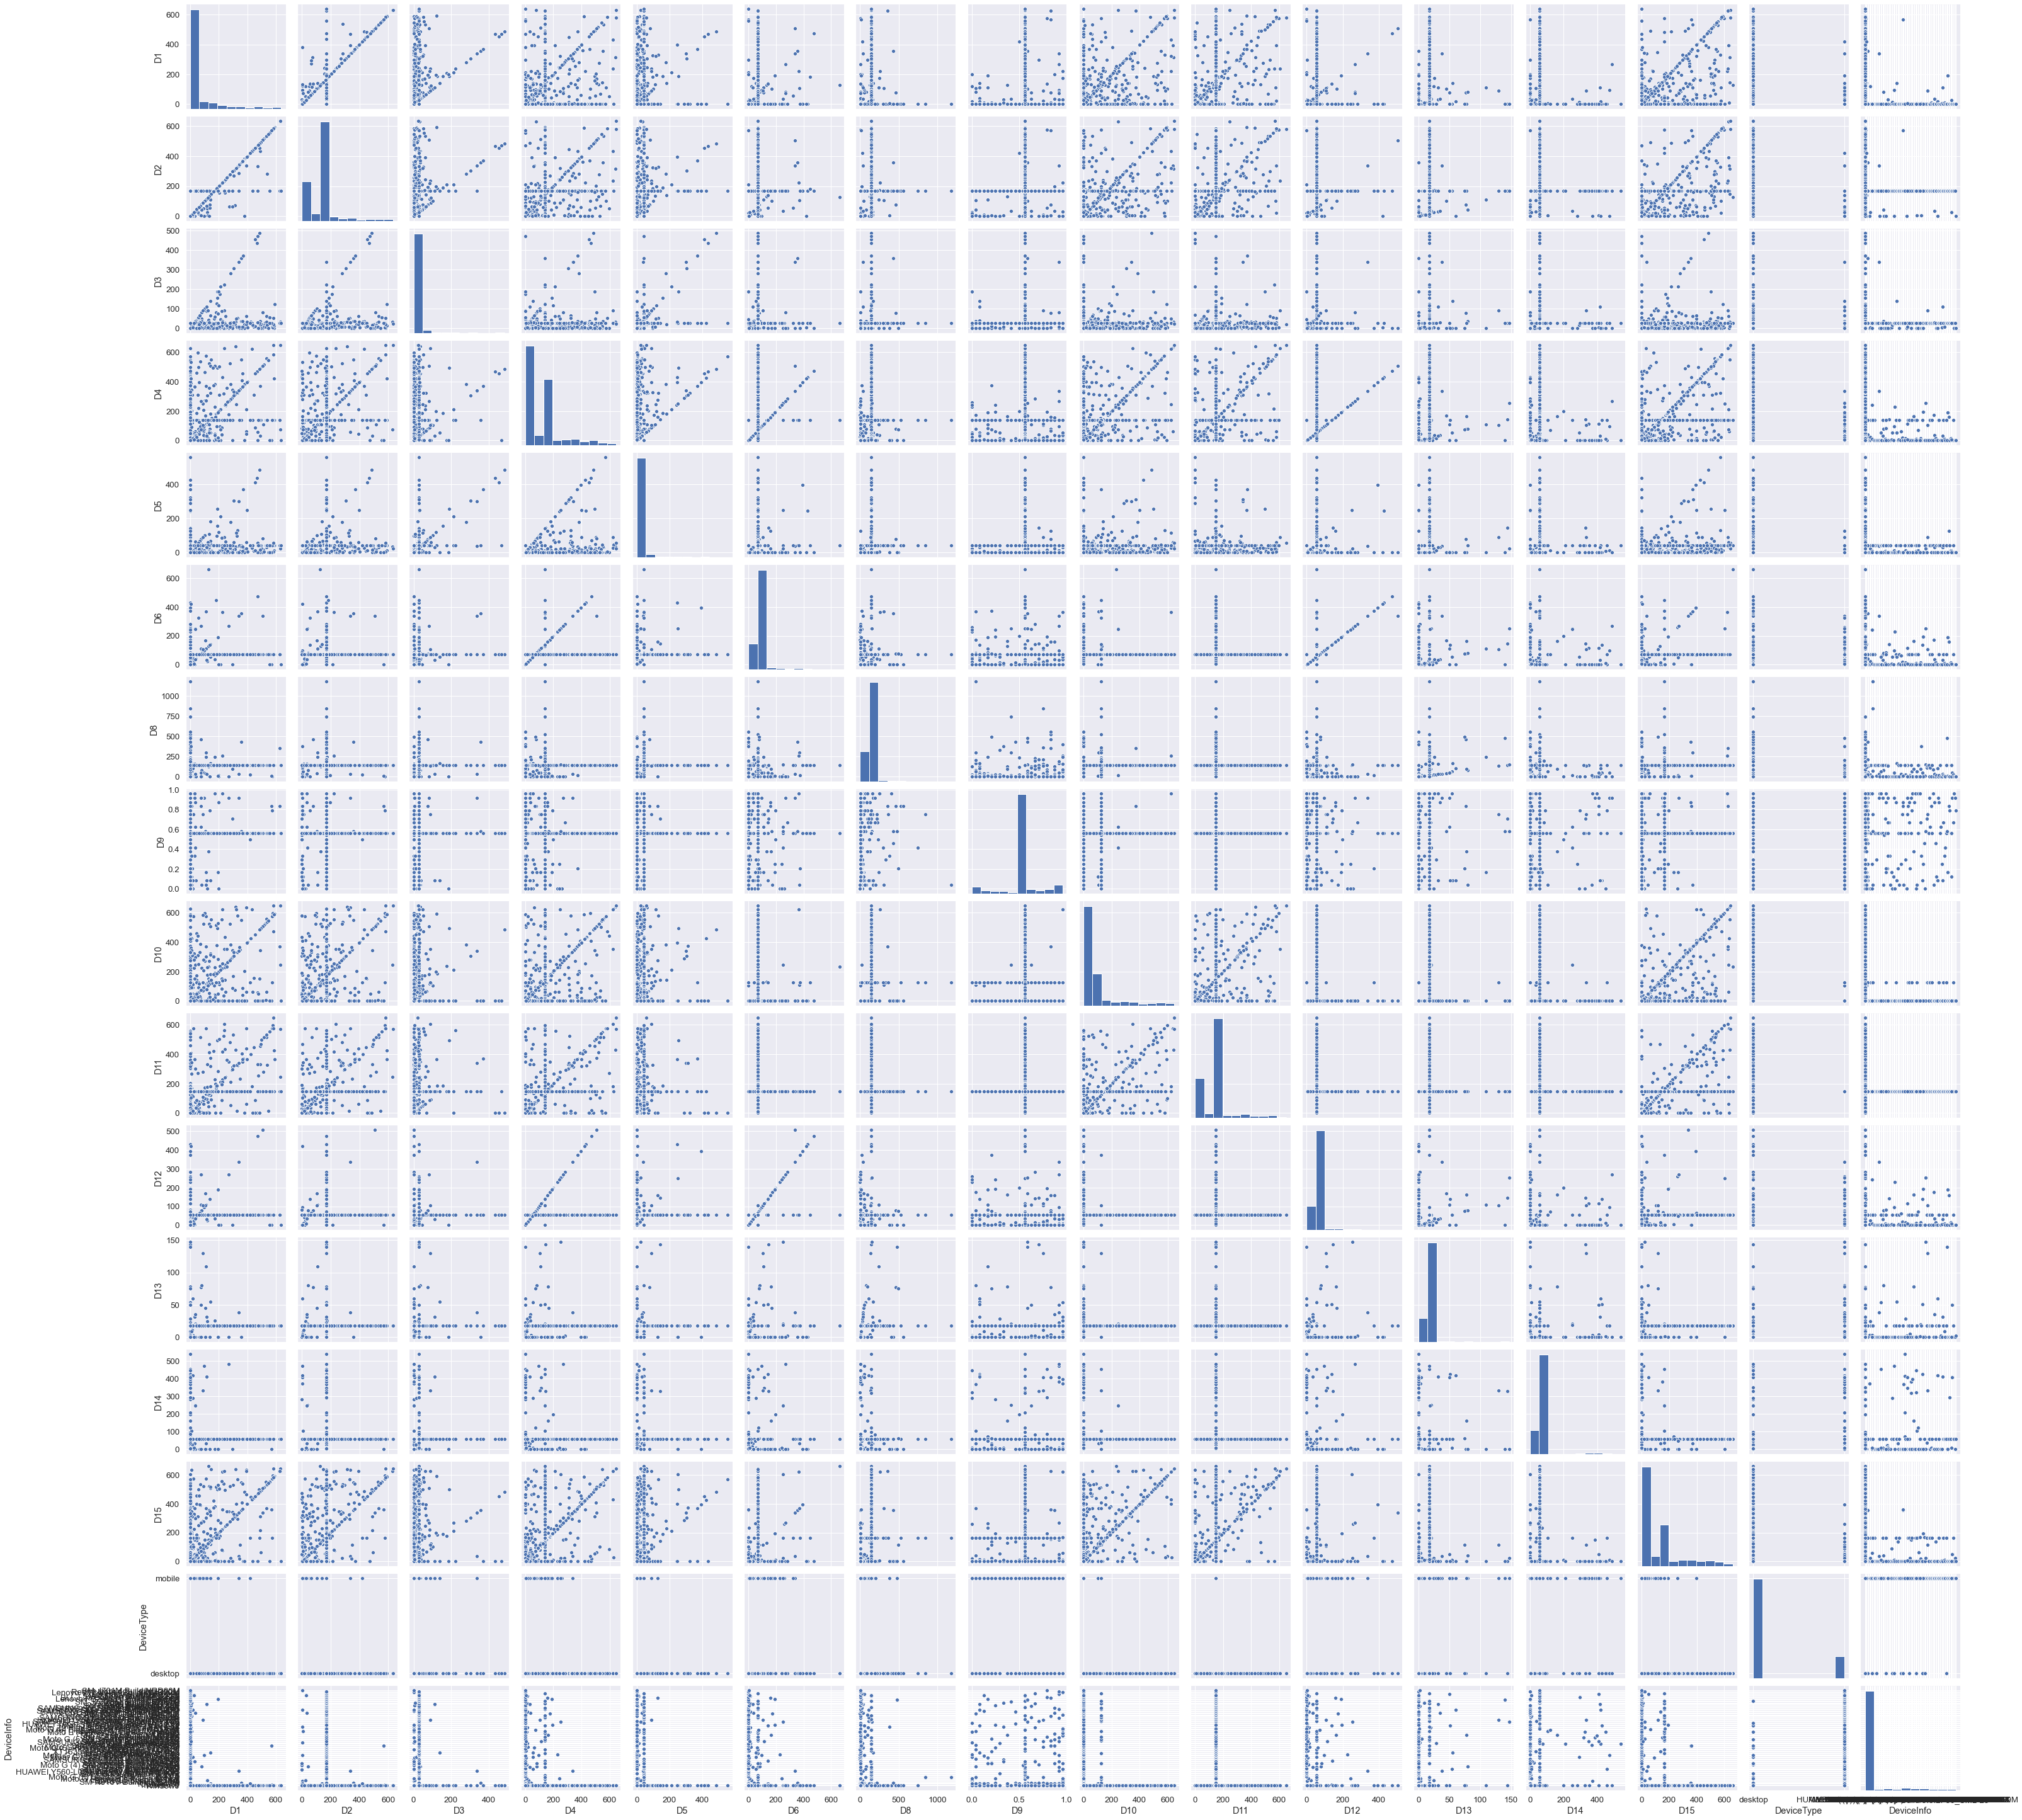

In [34]:
sns.pairplot(sampled_train, 
            vars=d_cols)
plt.show()

## M1-M9

Values are T F or NaN

Column M4 appears to be different with values like M2 and M0

In [35]:
m_cols = [c for c in train if c[0] == 'M']
train[m_cols].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,F,F,T
1,T,T,T,M0,T,T,F,F,T
2,T,T,T,M0,F,F,F,F,F
3,T,T,T,M0,T,F,F,F,T
4,T,T,T,M0,F,F,F,F,T


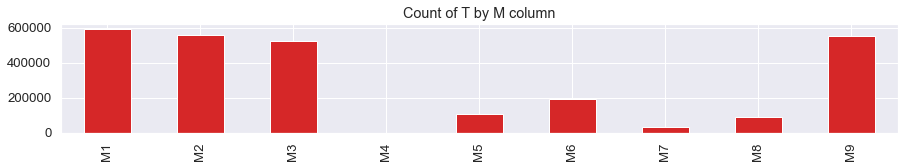

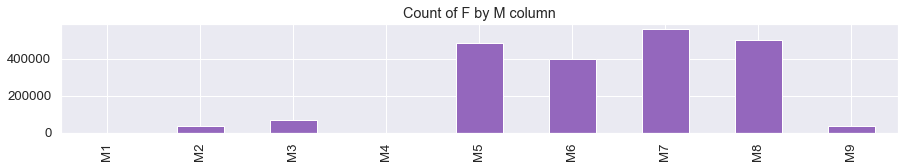

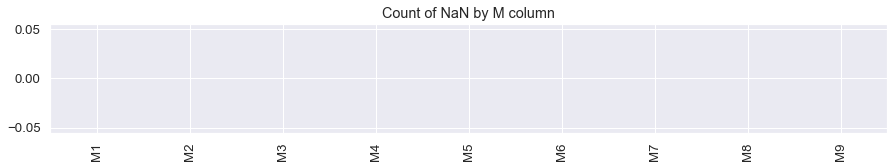

In [36]:
(train[m_cols] == 'T').sum().plot(kind='bar',
                                              title='Count of T by M column',
                                              figsize=(15, 2),
                                              color=color_pal[3])
plt.show()
(train[m_cols] == 'F').sum().plot(kind='bar',
                                              title='Count of F by M column',
                                              figsize=(15, 2),
                                              color=color_pal[4])
plt.show()
(train[m_cols].isna()).sum().plot(kind='bar',
                                              title='Count of NaN by M column',
                                              figsize=(15, 2),
                                              color=color_pal[0])
plt.show()

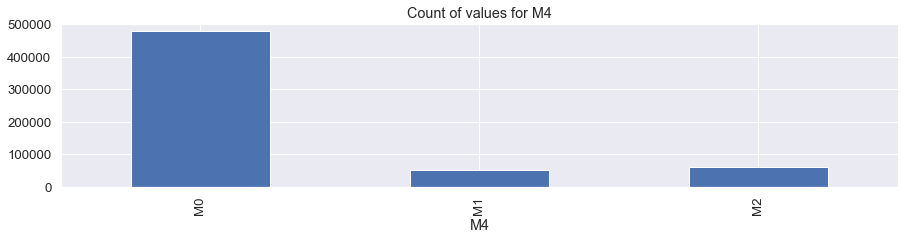

In [37]:
# Looking at M4 column since it is different than the others
train.groupby('M4')['TransactionID'] \
    .count() \
    .plot(kind='bar',
          title='Count of values for M4',
          figsize=(15, 3))
plt.show()


## V1 - V339

Lots of 1s 0s and Nans, some larger values

In [38]:
v_cols = [c for c in train if c[0] == 'V']
train[v_cols].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
1,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
3,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
4,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [39]:
train[v_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.164550,28.530903,55.352422,151.160542,100.700882
std,0.005365,0.174335,0.232963,0.319475,0.345501,0.173792,0.221267,0.135085,0.164320,0.378621,...,1.765559,2321.688741,4170.926347,2970.898706,91.064804,144.751912,102.534859,249.632064,408.917095,304.324367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.999945,1.000000,1.000000,0.846456,0.876991,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.164550,28.530903,55.352422,151.160542,100.700882
50%,1.000000,1.000000,1.078075,0.846456,0.876991,1.000000,1.072870,1.000000,1.000000,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.164550,28.530903,55.352422,151.160542,100.700882
75%,1.000000,1.045204,1.078075,1.000000,1.000000,1.045686,1.072870,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.164550,28.530903,55.352422,151.160542,100.700882
max,1.000000,8.000000,9.000000,6.000000,6.000000,9.000000,9.000000,8.000000,8.000000,4.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


In [40]:
train['v_mean'] = train[v_cols].mean(axis=1)

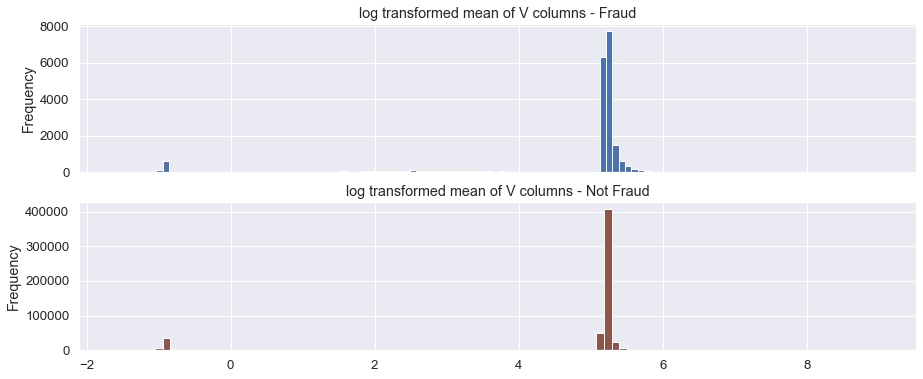

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6))
train.loc[train['isFraud'] == 1]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Fraud',
          ax=ax1)
train.loc[train['isFraud'] == 0]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Not Fraud',
          color=color_pal[5],
          ax=ax2)
plt.show()

In [46]:
train.to_csv('train_eda.csv', index=False)